In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [2]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [15]:
import pyrankability

In [13]:
D = pd.read_csv(home+'/rankability_weighted_data/io_examples/N-t59b11xx',skiprows=1,header=None,sep=' ')
D = D.drop(0,axis=1)
D.columns = D.index
D

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1990,520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,170,0,0,0
1,0,0,6880,0,1600,0,0,600,60,0,...,0,0,0,0,0,0,430,0,0,0
2,0,0,10,210,1760,0,5660,180,140,130,...,0,0,0,0,0,140,70,0,0,0
3,590,70,0,7240,350,0,450,610,260,80,...,10,0,0,0,0,620,1630,0,0,0
4,300,0,0,0,1030,0,1790,840,1340,0,...,0,0,0,0,0,710,960,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,270,570,0,0,0,0,20040,0,240,4720,...,0,0,0,0,0,0,60,0,0,0
7,200,0,0,0,0,0,450,8060,750,100,...,0,0,310,0,0,0,190,0,0,0
8,2510,0,0,0,0,0,0,0,4100,0,...,0,0,340,0,0,680,530,0,0,0
9,0,230,0,0,30,0,0,0,430,760,...,0,0,50,0,0,0,280,0,0,0


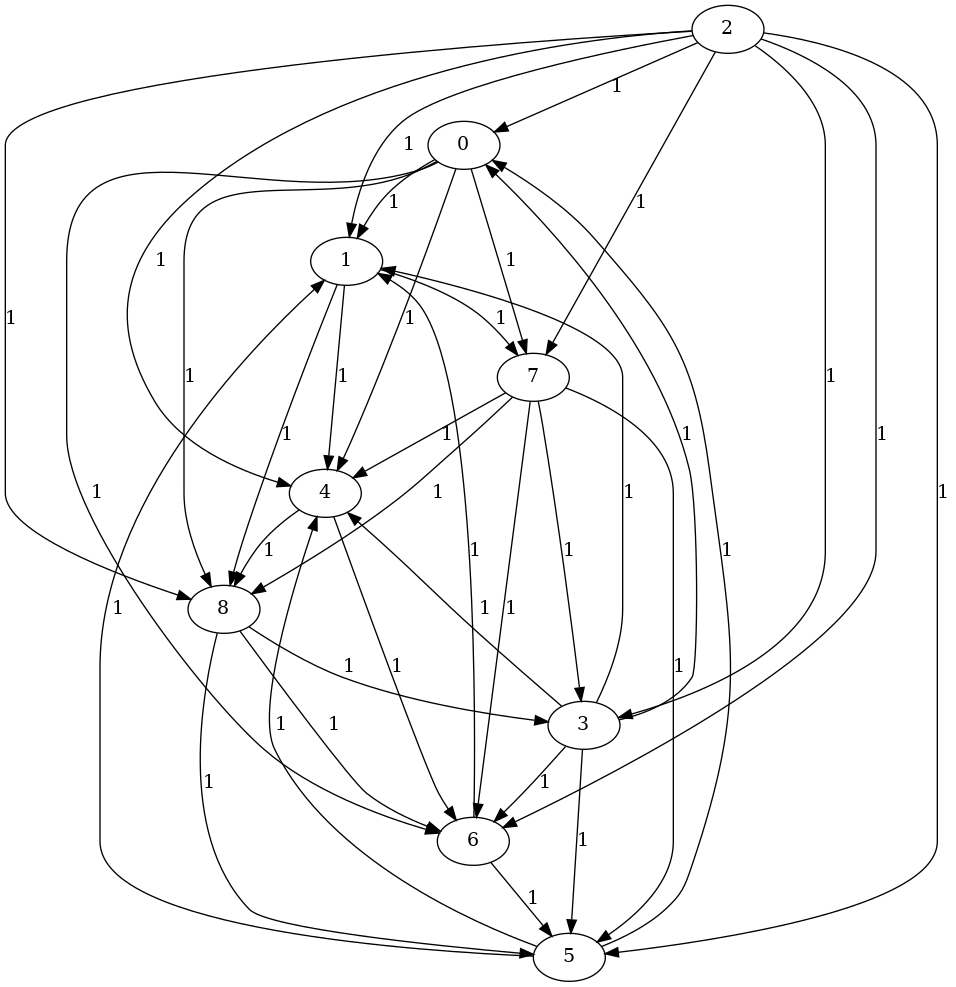

In [8]:
pyrankability.plot.D_as_graph(D1999,file='D1999_graph.png')

## Hillside BILP

In [9]:
D

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,0,1,1,1
1,0,0,0,0,1,0,0,1,1
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,0
4,0,0,0,0,0,0,1,0,1
5,1,1,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0
7,0,0,0,1,1,1,1,0,1
8,0,0,0,1,0,1,1,0,0


In [10]:
k,details = pyrankability.rank.solve(D1999,method='hillside',cont=False)
k

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-17


72

In [11]:
perm = np.array(details['P'][0])
np.sum(np.triu(pyrankability.construct.C_count(D1999).values[perm,:][:,perm]))

72.0

In [12]:
D1999.iloc[perm,:].iloc[:,perm]

,2,7,3,0,8,5,1,6,4
2,0,1,1,1,1,1,1,1,1
7,0,0,1,0,1,1,0,1,1
3,0,0,0,1,0,1,1,1,1
0,0,1,0,0,1,0,1,1,1
8,0,0,1,0,0,1,0,1,0
5,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0,1,0


In [13]:
np.tril(pyrankability.construct.C_count(D1999).values[perm,:][:,perm])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  4.,  6.,  8.,  0.,  0.,  0.,  0.,  0.],
       [10.,  8.,  4.,  6.,  6.,  0.,  0.,  0.,  0.],
       [10.,  6.,  8.,  4.,  6.,  4.,  0.,  0.,  0.],
       [12.,  8.,  6.,  8.,  4.,  4.,  6.,  0.,  0.],
       [12.,  6.,  8.,  6.,  4.,  6.,  4.,  4.,  0.]])

### One solution

In [14]:
pd.Series(details['P'][0])

0    2
1    7
2    3
3    0
4    8
5    5
6    1
7    6
8    4
dtype: int64

In [15]:
pd.DataFrame(details['x'])

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,1,1,0,1
1,0,0,0,0,1,0,1,0,0
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,0
6,0,0,0,0,1,0,0,0,0
7,1,1,0,1,1,1,1,0,1
8,0,1,0,0,1,1,1,0,0


## Hillside LP

In [16]:
k,details = pyrankability.rank.solve(D1999,method='hillside',cont=True)
k

72

In [17]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0
1,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.5
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.5,1.0,0.0,0.0,1.0,1.0,1.0,0.5,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
5,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.5
6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
7,0.5,1.0,0.0,0.5,1.0,1.0,1.0,0.0,1.0
8,0.0,0.5,0.0,0.0,1.0,0.5,1.0,0.0,0.0


## Most distant pairs

In [18]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D1999,method='hillside',verbose=False)
details_two_distant['obj']

7.0

In [19]:
def calc_tau(n,obj):
    nchoose2 = pyrankability.common.nCr(n,2)
    tau = (nchoose2 - obj)/nchoose2
    return tau

In [20]:
calc_tau(len(D1999),details_two_distant['obj'])

0.8055555555555556

In [21]:
details_two_distant['perm_x']

(2, 0, 3, 7, 1, 5, 8, 6, 4)

In [22]:
details_two_distant['perm_y']

(2, 7, 3, 0, 8, 5, 1, 4, 6)

In [23]:
list(details_two_distant['perm_x'])

[2, 0, 3, 7, 1, 5, 8, 6, 4]

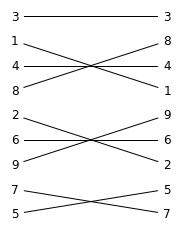

In [24]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_2_max_pair",width=3,height=4)

In [25]:
details_two_distant['obj']

7.0

## LOP

In [26]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=False)
k

6

In [27]:
pd.Series(details['P'][0])+1

0    3
1    8
2    4
3    6
4    1
5    2
6    5
7    9
8    7
dtype: int64

In [28]:
perm = np.array(details['P'][0])
Dre = D1999.iloc[perm,:].iloc[:,perm]
orig_siam_unweighted_k = sum(Dre.values[np.triu_indices(len(Dre),1)]==0)+sum(Dre.values[np.tril_indices(len(Dre))]==1)
orig_siam_unweighted_k

12

In [29]:
import itertools
min_P = np.Inf
P = []
for perm in itertools.permutations(range(len(D1999))):
    perm = np.array(perm)
    Dre = D1999.iloc[perm,:].iloc[:,perm]
    orig_siam_unweighted_k = sum(Dre.values[np.triu_indices(len(Dre),1)]==0)+sum(Dre.values[np.tril_indices(len(Dre))]==1)
    if orig_siam_unweighted_k < min_P:
        min_P = orig_siam_unweighted_k
        P = [perm]
    elif orig_siam_unweighted_k == min_P:
        P.append(perm)

### Original P set from SIMODS

In [30]:
min_P

12

In [31]:
(np.array(P)+1).T

array([[3, 3, 3, 3],
       [1, 4, 4, 8],
       [8, 1, 6, 4],
       [9, 2, 1, 6],
       [4, 8, 2, 1],
       [7, 5, 8, 2],
       [6, 9, 5, 5],
       [2, 7, 9, 9],
       [5, 6, 7, 7]])

### Here is LOP
All that changes is the objective function

In [47]:
import itertools
min_P = np.Inf
P = []
for perm in itertools.permutations(range(len(D1999))):
    perm = np.array(perm)
    Dre = D1999.iloc[perm,:].iloc[:,perm]
    lop_k = np.sum(np.tril(Dre))
    if lop_k < min_P:
        min_P = lop_k
        P = [perm]
    elif lop_k == min_P:
        P.append(perm)

In [48]:
min_P

6

In [49]:
(np.array(P)+1).T

array([[3, 3, 3, 3],
       [1, 4, 4, 8],
       [8, 1, 6, 4],
       [9, 2, 1, 6],
       [4, 8, 2, 1],
       [7, 5, 8, 2],
       [6, 9, 5, 5],
       [2, 7, 9, 9],
       [5, 6, 7, 7]])

### Now onto max pair

In [16]:
k_lop,details_lop = pyrankability.rank.solve(D,method='lop',cont=False)
k_lop

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-17


11015

In [18]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D,method='lop',verbose=False,cont=False)
details_two_distant

{'obj': 336.0,
 'k_x': 209320,
 'k_y': 209320,
 'perm_x': (37,
  29,
  41,
  35,
  42,
  38,
  5,
  43,
  33,
  24,
  3,
  27,
  23,
  34,
  1,
  30,
  2,
  4,
  39,
  32,
  28,
  7,
  6,
  11,
  9,
  8,
  12,
  10,
  0,
  15,
  21,
  22,
  14,
  31,
  26,
  36,
  16,
  17,
  18,
  20,
  13,
  25,
  40,
  19),
 'perm_y': (33,
  24,
  3,
  27,
  23,
  34,
  1,
  30,
  2,
  4,
  39,
  32,
  28,
  7,
  6,
  9,
  8,
  11,
  12,
  10,
  0,
  15,
  21,
  22,
  14,
  31,
  26,
  19,
  16,
  17,
  20,
  25,
  18,
  13,
  40,
  36,
  43,
  5,
  38,
  42,
  35,
  41,
  29,
  37),
 'c1':       0    1     2     3     4   5      6     7     8     9   ...   34  35  \
 0   1990  520     0     0     0   0      0     0     0     0  ...    0   0   
 1      0    0  6880     0  1600   0      0   600    60     0  ...    0   0   
 2      0    0    10   210  1760   0   5660   180   140   130  ...    0   0   
 3    590   70     0  7240   350   0    450   610   260    80  ...   10   0   
 4    300    0     0  

In [19]:
calc_tau(len(D1999),details_two_distant['obj'])

NameError: name 'calc_tau' is not defined

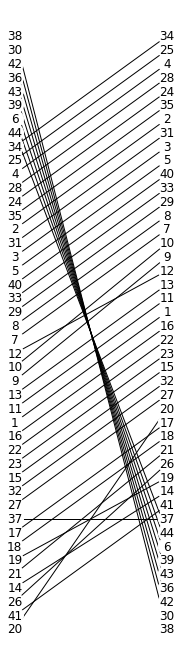

In [21]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_2_max_pair_lop",width=3,height=12)

### LOP LP

In [82]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=True)
k

9

In [83]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,0.0,0.357096,1.000000,0.626943,1.000000,0.741163,1.000000
1,0.000000,0.000000,0.0,0.000000,1.000000,0.269847,0.642904,0.384067,0.642904
2,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.642904,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.384067,0.642904
4,0.000000,0.000000,0.0,0.000000,0.000000,0.269847,0.642904,0.000000,0.642904
5,0.373057,0.730153,0.0,0.000000,0.730153,0.000000,0.373057,0.114220,0.373057
6,0.000000,0.357096,0.0,0.000000,0.357096,0.626943,0.000000,0.000000,0.000000
7,0.258837,0.615933,0.0,0.615933,1.000000,0.885780,1.000000,0.000000,1.000000
8,0.000000,0.357096,0.0,0.357096,0.357096,0.626943,1.000000,0.000000,0.000000
